# Computational Social Science Project #2 

**Enter your Name:** Yue Lin

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv('/Users/yuelin/Documents/GitHub/CSS/Computational-Social-Science-Training-Program/Projects/Project 2/Diabetes with Population Info by County 2017.csv', 
                       dtype={"CountyFIPS": str}) 
diabetes

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,Sweetwater County,Wyoming,56037,2560,9362,7518,92.0,44117,43226,891,...,30491,6159,4721,32308,16800,15508,108.3,4721,2262,2459
3216,Teton County,Wyoming,56039,439,2051,2005,94.8,23059,22875,184,...,18169,3843,3135,18625,9619,9006,106.8,3135,1526,1609
3217,Uinta County,Wyoming,56041,1440,4925,3519,97.6,20609,19891,718,...,13939,3251,2498,14538,7280,7258,100.3,2498,1234,1264
3218,Washakie County,Wyoming,56043,637,1738,1708,89.0,8129,7791,338,...,5951,2041,1686,6187,3142,3045,103.2,1686,794,892


In [3]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [4]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

['Suppressed']


In [6]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()) 

['No Data']


In [7]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()) 

['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' to (you'll have to scroll all the way over to the right).

In [8]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64') 

# Obesity
# ----------
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int64')

# Physical Inactivity
# ----------
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int64') 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float')

/var/folders/hw/lfl51yf53sq5394y_08594yw0000gn/T/ipykernel_49673/2211987374.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64')


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [9]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [10]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [11]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population',
 'sex and age_total population_18 years and over_1',
 'race_total population_one race_1',
 'sex and age_total population_65 years and over_1']

In [12]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=['sex and age_total population_65 years and over_1',
 'sex and age_total population_18 years and over_1',
 'sex and age_total population',
 'race_total population_one race_1',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population']) 

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [13]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

In [14]:
diabetes['Region']

0       Southeast
1       Southeast
2       Southeast
3       Southeast
4       Southeast
          ...    
3215         West
3216         West
3217         West
3218         West
3219         West
Name: Region, Length: 3112, dtype: object

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

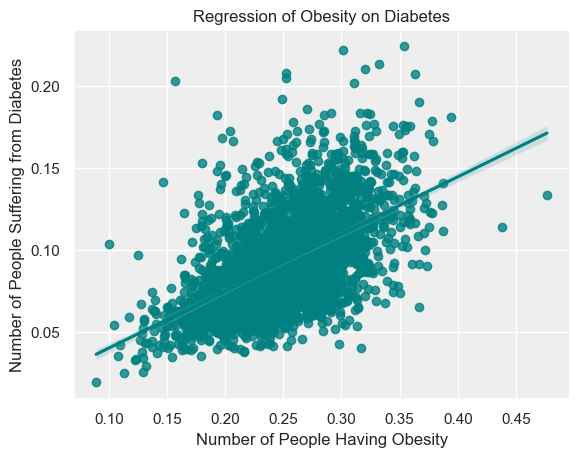

In [15]:
#
# EDA #1 and interpretations in this section 
#-----------
# Plotting with Seaborn

# import seaborn as sns alias
import seaborn as sns

# set coloring
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

# regress Diabetes_Number on Obesity_Number using seaborn library
sns.regplot(x='Obesity_Number', y='Diabetes_Number', data=diabetes, color='teal')

# format title and labels
plt.title('Regression of Obesity on Diabetes')
plt.xlabel('Number of People Having Obesity')
plt.ylabel('Number of People Suffering from Diabetes');

**Interpretation:**
The number of people having obesity tends to positively correlate with the number of people suffering from diabetes. At best we can argue that obesity might be a good predictor of diabetes, but cannot make a causal claim with this regression alone.

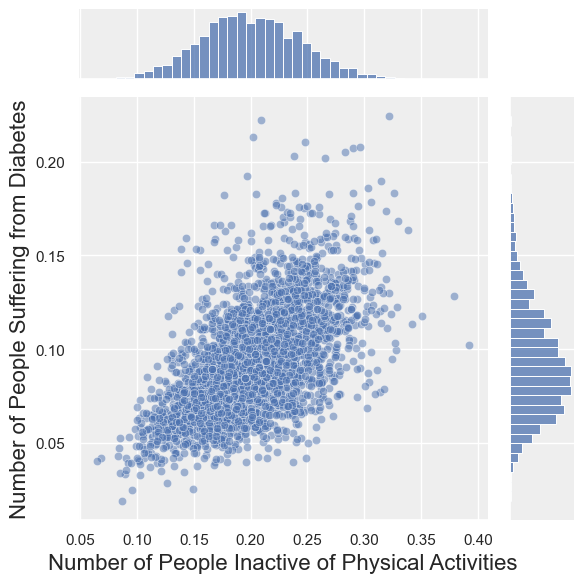

In [16]:
#
# EDA #2 and interpretations in this section 
#-----------
# Plotting with Joint Distribution

# specify a joint distribution
j_plot = sns.jointplot(x = 'Physical_Inactivity_Number', y = 'Diabetes_Number', data = diabetes, alpha = .5)

# JointGrid has a convenience function
j_plot.set_axis_labels('Number of People Inactive of Physical Activities', 'Number of People Suffering from Diabetes', fontsize=16)

# labels appear outside of plot area, so auto-adjust
plt.tight_layout();

**Interpretation:**
The number of people lacking enough physical activities tends to positively correlate with the number of people suffering from diabetes. Again, at best we can argue that physical inactivity might be a good predictor of diabetes, but cannot make a causal claim with this regression alone.

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [17]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region' , which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [18]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(['Diabetes_Number','race alone or in combination with one or more other races_total population'], 
                axis=1) 

In [19]:
y

0       0.093804
1       0.080281
2       0.131875
3       0.105251
4       0.108977
          ...   
3215    0.058028
3216    0.019038
3217    0.069872
3218    0.078361
3219    0.084648
Name: Diabetes_Number, Length: 3112, dtype: float64

In [20]:
X

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or more races,total housing units,citizen - voting age population_citizen - 18 a

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [21]:
#
# Feature selection
#-----------

# As indicated in the EDA plots, features like 'Obesity_Number and 'Physical_Inactivity_Number' 
# are positively related to the target 'Diabetes_Number,' so we should retain useful and related features like them, 
# but drop the target (already achieved in the previous step of data partition), unrelated features, 
# and features that will lead to multicollinearity.

X = X.drop(['total housing units', 
                        'CountyFIPS', # unrelated feature to predict the target 
                         'race_total population_two or more races',
                         'race_total population_one race_white',
                         'race_total population_one race_american indian and alaska native_sioux tribal grouping',
                         'race_total population_one race_asian_asian indian',
                         'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
                         'race_total population_two or more races_white and black or african american',
                         'race alone or in combination with one or more other races_total population_white',
                         'hispanic or latino and race_total population_hispanic or latino (of any race)',
                         'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
                         'hispanic or latino and race_total population_not hispanic or latino_white alone',
                         'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
                         'citizen -  voting age population_citizen -  18 and over population_male',
                         'sex and age_total population_male', 
                         'sex and age_total population_under 5 years',
                         'sex and age_total population_under 18 years',
                         'sex and age_total population_18 years and over_male',
                         'sex and age_total population_65 years and over_male',
                         'sex and age_total population_65 years and over',
                         'Region_Northeast'], # drop features that will lead to multicollinearity
                          axis= 1) 

In [22]:
X

,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_asian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three or more races,citizen - voting age population_citizen - 18 and over population,citizen - voting age population_citizen - 18 and over population_female,sex and age_total population_female,sex and age_total population_sex ratio (males per 100 females),sex and age_total population_5 to 9 years,sex and age_total population_10 to 14 years,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_median age (years),sex and age_total population_16 years and over,sex and age_total population_18 years and ov

In [23]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=.8,      # specify proportional split for training
                                                    test_size=.2)       # specify proportional split for test

In [24]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate = train_test_split(X_train,         # specify training x
                                                            y_train,         # specify training y
                                                            train_size=0.75, # set training proportional spilt
                                                            test_size=0.25)  # set testing proportional split

In [25]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** 
1. **Linear regression**: it models the relationship between a dependent variable (target) and one or more independent variables (predictors or features).  
    - Assumptions: (1) linearity: a linear relationship between predictors and the target, with each predictor having a certain weight or coefficient. (2) Independence: observations (data points) are independent of each other. (3) Homoscedasticity: constant variance of errors (residuals) across all levels of predictors. (4) Normality of Residuals: the residuals follow a normal distribution.
    - Pros: (1) simple and interpretable; (2) provides insight into the impact of individual predictors or features; (3) serve as a baseline model for more complex methods.
    - Cons: (1) assumes a linear relationship, which may not hold for complex data; (2) sensitive to outliers; (3) does not handle multicollinearity well.
    - Suitability for this problem: many of the columns in this dataset include socioeconomic variables like region, race, gender, and age composition, which are assumably important predictors of the target (i.e., numbers of people suffering from diabetes) and have been backed by domain knowledge in existing literature. We could hypothesize a linear relationship between, say, numbers of people with obesity and the target, as shown in plots above in the EDA stage. Hence, we can say that linearity is likely between other variables and the target. Moreover, each observation cell in the target column is independently collected and coded at the county level, so we realize the "Independence" assumption.  
***
2. **Ridge regression**: a regularization technique applied to linear regression. It aims to prevent overfitting by adding a penalty term to the linear regression's cost function. This penalty term (L2 norm) encourages the model to have small coefficient values, effectively reducing the impact of less important predictors. 
    - Assumptions: hold the same assumptions as linear regression (linearity, independence, homoscedasticity, and normality of residuals). Additionally, it allows the presence of multicollinearity, where predictor variables are highly correlated. 
    - Pros: (1) mitigates overfitting by shrinking coefficient values; (2) effective at handling multicollinearity; (3) suitable for situations with many predictors; (4) useful when the primary goal is predictive accuracy rather than model interpretability.
    - Cons: (1) all features are retained, so it does not perform feature selection; (2) interpretability can be reduced due to shrunken coefficients (towards zero but not set exactly to zero), which is particularly salient for situations of having many predictors in a model, Ridge will make it harder to discern the most influential predictors.
    - Suitability for this problem: many of the columns in this dataset include socioeconomic variables like region, race, gender, and age composition, which are assumably important predictors of the target (i.e., numbers of people suffering from diabetes) and have been backed by domain knowledge in existing literature. We could hypothesize a linear relationship between, say, numbers of people with obesity and the target, as shown in plots above in the EDA stage. Hence, we can say that linearity is likely between other variables and the target. Moreover, each observation cell in the target column is independently collected and coded at the county level, so we realize the "Independence" assumption.
***
3. **Lasso regression**: another regularization technique applied to linear regression. Just like Ridge, Lasso also adds a penalty term (L1 norm) to the linear regression's cost function. Although the cost function for both Ridge and Lasso are similar, Ridge takes the square of the coefficients whereas lasso takes the magnitude.  Lasso encourages sparsity in the coefficient estimates, effectively performing feature selection by pushing some coefficients to exactly zero, as compared to Ridge which never sets the value of coefficients to zero. 
    - Assumptions: hold the same assumptions as linear regression (linearity, independence, homoscedasticity, and normality of residuals).
    - Pros: (1) performs automatic feature selection, simplifying models; (2) effective in high-dimensional datasets. One cannot fit a linear model where there are more features than there are observations (data points). Lasso can do so by adding a penalty term based on the absolute values of the coefficients to the linear regression cost function, and encouraging some coefficients to become exactly zero. As a result, it selects the most relevant features in high-dimensional datasets while simultaneously mitigating the risk of overfitting; (3) handles multicollinearity well.
    - Cons: (1) feature selection bias (e.g., loss of information; Lasso may not perform well when all features are important; Lasso's automatic feature selection can disregard certain domain knowledge; etc.); (2) can lead to unstable coefficient estimates when there is multicollinearity. This is because Lasso struggles to choose between highly correlated features in the face of multicollinearity. It can set some coefficients to zero arbitrarily, making results sensitive to minor data changes. This instability means different runs can yield different features and coefficients, hurting model reliability.
    - Suitability for this problem: many of the columns in this dataset include socioeconomic variables like region, race, gender, and age composition, which are assumably important predictors of the target (i.e., numbers of people suffering from diabetes) and have been backed by domain knowledge in existing literature. We could hypothesize a linear relationship between, say, numbers of people with obesity and the target, as shown in plots above in the EDA stage. Hence, we can say that linearity is likely between other variables and the target. Moreover, each observation cell in the target column is independently collected and coded at the county level, so we realize the "Independence" assumption.

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1: Linear Regression

In [26]:
#
# Model 1 training
#-----------

from sklearn.linear_model import Ridge, Lasso, LinearRegression

# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [42]:
# extract the coefficents and create a dataframe for plotting 
lin_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(lin_model.coef_))],
                       axis = 1)

lin_data.columns = ['Feature', 'Coefficient']
lin_data['abs_coef'] = abs(lin_data['Coefficient'])

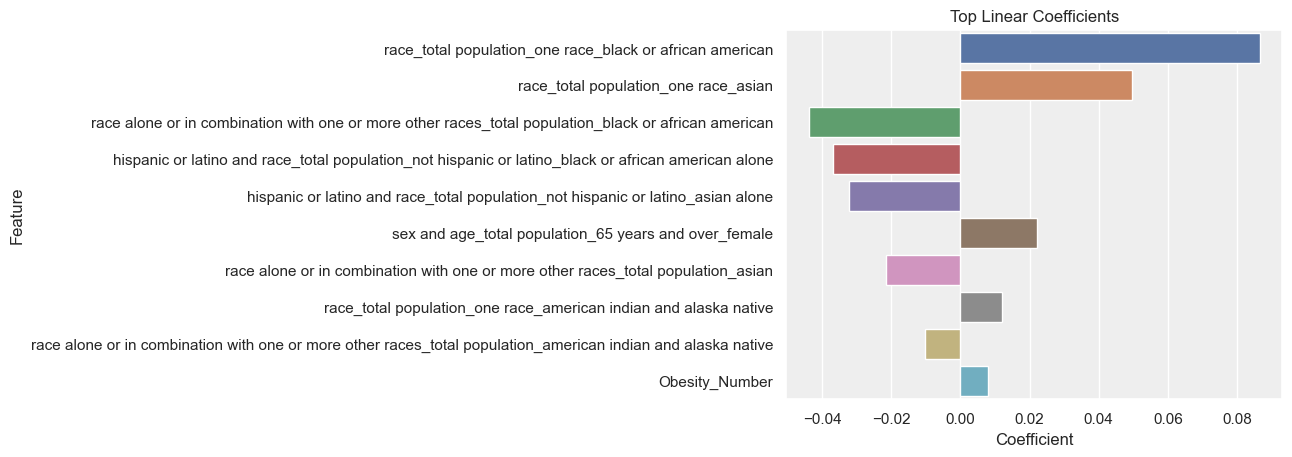

In [43]:
# plot 10 coefficients with the largest absolute value based on the code above
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lin_data.nlargest(10, 'abs_coef')).set_title("Top Linear Coefficients") 
plt.show()

In [27]:
# Alternatively, double check the coefficients in a table view
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T 
lin_reg_data.columns = ['Coefficient', 'Feature']
lin_reg_data

,Coefficient,Feature
0,0.00793,Obesity_Number
1,0.007357,Physical_Inactivity_Number
2,0.003314,sex and age_total population_65 years and over...
3,0.000368,race_total population
4,-0.005592,race_total population_one race
5,0.0866,race_total population_one race_black or africa...
6,0.01207,race_total population_one race_american indian...
7,0.000988,race_total population_one race_american indian...
8,-0.000443,race_total population_one race_american indian...
9,0.000318,race_total population_one race_american indian...


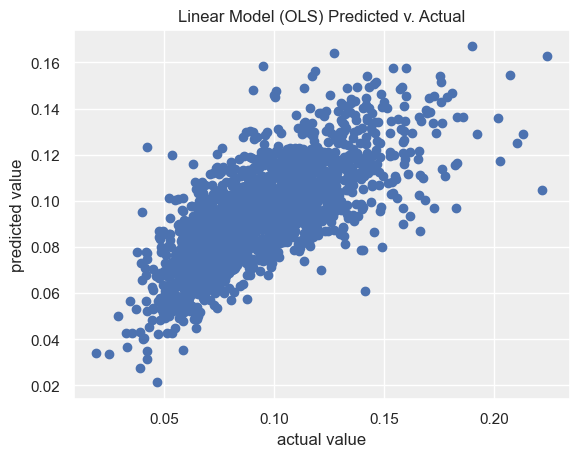

In [28]:
# using the training dataset and the trained model, predict the number of diabetes 
lin_train = lin_model.predict(X_train)

# plot the residuals on a scatter plot
plt.scatter(y_train, lin_train)                     # specify x and y of the scatter plot
plt.title('Linear Model (OLS) Predicted v. Actual')  # specify plot title, adding labels here and below
plt.xlabel('actual value')                           # specify x-axis label
plt.ylabel('predicted value')                        # specify y-axis label
plt.show()                                           # show plot

In [29]:
# To be more accurate about how good this model fits the training data, we can calculate the root mean squared error (i.e., RMSE)

# import library 
from sklearn.metrics import mean_squared_error

# print out RMSE result
print(mean_squared_error(lin_train,
                         y_train, 
                         squared = False)) # set squared parameter to false to get root, otherwise mean square error

0.019610108188024847


This very small number 0.01961 indicates that the linear regression model fits the training data very well.

#### Model 2: Ridge Regression

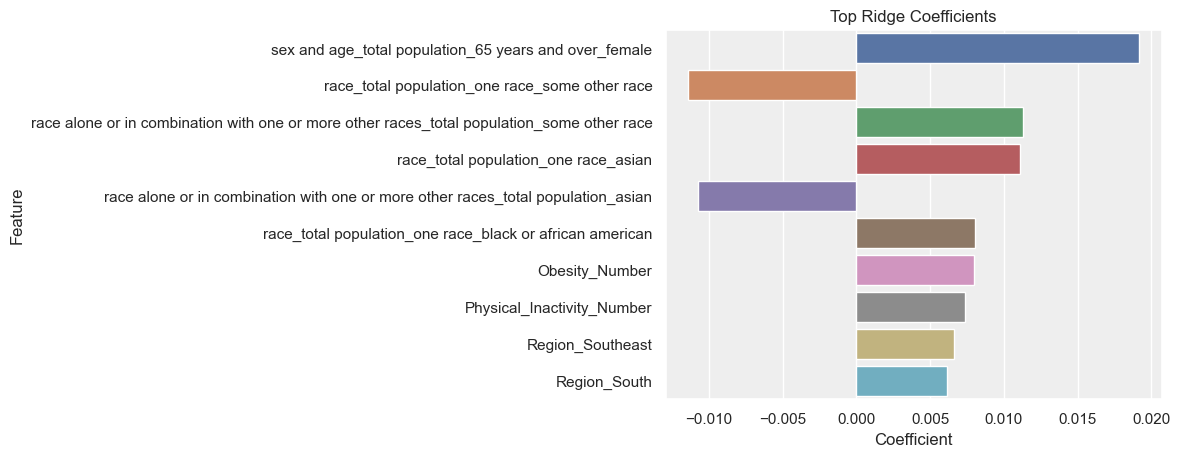

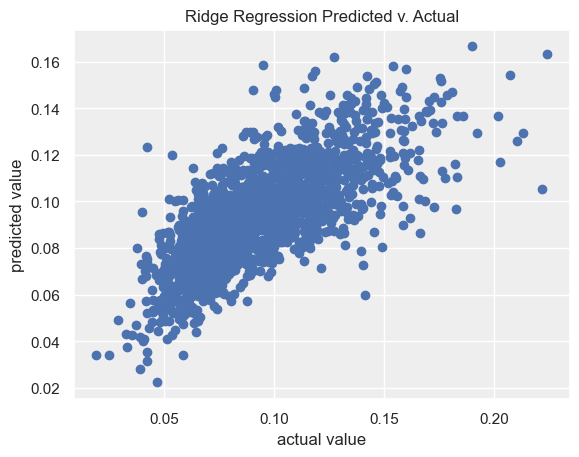

0.019628313611505094


In [44]:
#
# Model 2 training
#-----------

# make and fit a Ridge regression model
ridge_reg = Ridge()                                              # create the model
ridge_model = ridge_reg.fit(X_train, y_train)                    # fit the model by training datasets

# print model coefficients 
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T 
ridge_reg_data.columns = ['Coefficient', 'Feature']
ridge_reg_data

# extract the coefficents and create a dataframe for plotting 
ridge_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(ridge_model.coef_))],
                       axis = 1)
ridge_data.columns = ['Feature', 'Coefficient']
ridge_data['abs_coef'] = abs(ridge_data['Coefficient'])

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ridge_data.nlargest(10, 'abs_coef')).set_title("Top Ridge Coefficients") 
plt.show()

# using the training dataset and the trained model, predict the number of diabetes 
ridge_train = ridge_model.predict(X_train)

# plot the residuals on a scatter plot
plt.scatter(y_train, ridge_train)                     # specify x and y of the scatter plot
plt.title('Ridge Regression Predicted v. Actual')  # specify plot title, adding labels here and below
plt.xlabel('actual value')                           # specify x-axis label
plt.ylabel('predicted value')                        # specify y-axis label
plt.show()                                           # show plot

# To be more accurate about how good this model fits the training data, we can calculate the root mean squared error (i.e., RMSE)
# print out RMSE result
print(mean_squared_error(ridge_train,
                         y_train, 
                         squared = False)) # set squared parameter to false to get root, otherwise mean square error

This very small number 0.0196283 indicates that the Ridge model fits the training data very well, though it is slightly larger than the `RMSE` of the linear regression model, which suggests a slightly poorer fit than the linear regression model.

#### Model 3: Lasso Regression

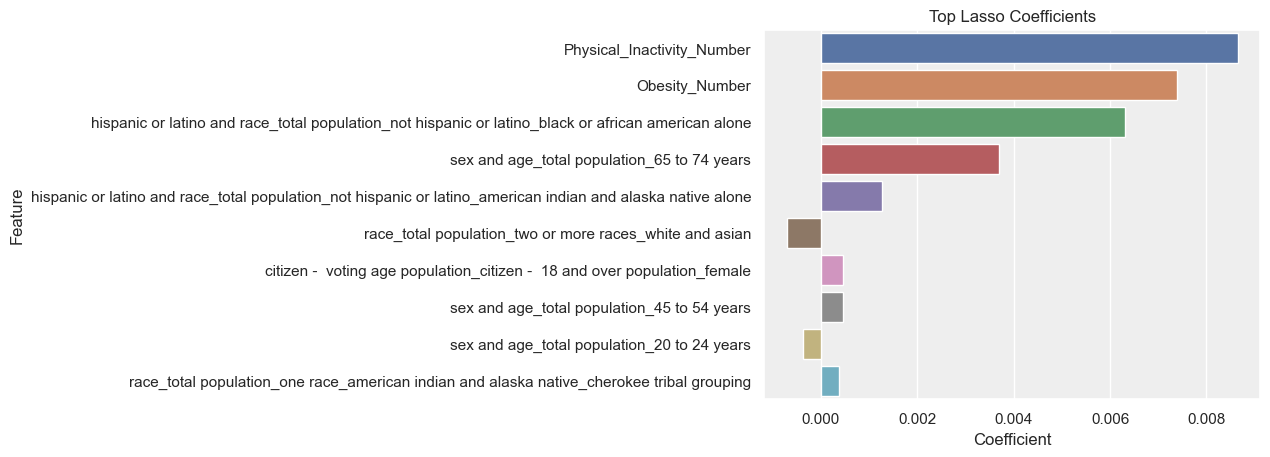

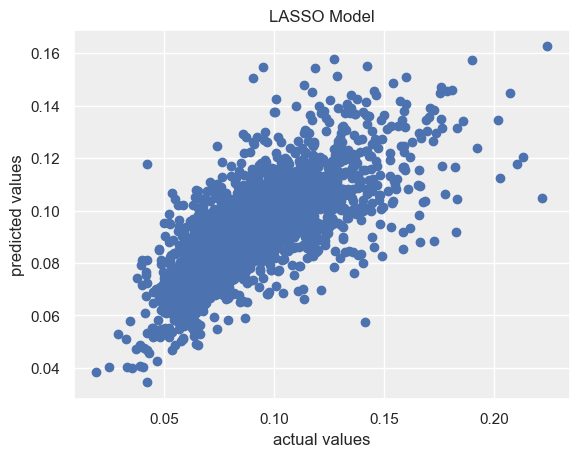

0.020438534333409458


In [45]:
#
# Model 3 training
#-----------
# create and fit the model
lasso_reg = Lasso(max_iter=15000, alpha = 0.001)  
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

# print model coefficients 
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T 
lasso_reg_data.columns = ['Coefficient', 'Feature']
lasso_reg_data

# extract the coefficents and create a dataframe for plotting 
lasso_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(lasso_model.coef_))],
                       axis = 1)
lasso_data.columns = ['Feature', 'Coefficient']
lasso_data['abs_coef'] = abs(lasso_data['Coefficient'])

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lasso_data.nlargest(10, 'abs_coef')).set_title("Top Lasso Coefficients") 
plt.show()

# use the model to make predictions
lasso_train = lasso_model.predict(X_train)

# plot the predictions
plt.scatter(y_train, lasso_train)

# add title and labels
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# calculate the rmse for the LASSO model
print(mean_squared_error(lasso_train,
                         y_train, 
                         squared = False))

This relatively large number 0.0204 indicates that the Lasso model has a slightly larger `RMSE` than those of the linear regression model and the Ridge model, which suggests that Lasso has the poorest fit among the three models. In this case, we can try hyperparameter tuning to see if we can improve the fit.

In [32]:
from sklearn.model_selection import GridSearchCV

# specify the hyperparameters
param_grid = {'alpha': np.arange(.0001, .001, .0001),
              'fit_intercept': [True, False],
              'selection': ['cyclic', 'random']}

# execute the grid search
lasso_grid_reg = GridSearchCV(lasso_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the training data
lasso_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on the training dataset 
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])   # find the best performing model
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_train)    # find best estimator and predict on training

# print results
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Training R^2:', lasso_grid_reg.score(X_train, y_train))
print('Training RMSE', mean_squared_error(best_lasso_pred, y_train, 
                         squared = False))

{'alpha': 0.0002, 'fit_intercept': True, 'selection': 'random'}
Best CV R^2: 0.504755272655378
Training R^2: 0.5285867236251423
Training RMSE 0.019838058834720777


After hyperparameter tuning, we find that when alpha is 0.0002, Lasso has a better fit with a smaller training `RMSE` of 0.019838. However, 0.019838 is still larger than the `RMSEs` of the linear regression model and the Ridge model. This still suggests that Lasso has the poorest fit among the three models.

## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [33]:
#
# Predict on validation data
#-----------

# Model 1: Linear Regression
# using the validation dataset and the trained model, predict the number of diabetes
lin_pred = lin_model.predict(X_validate)

# using RMSE to evaluate how good the model fits the validation dataset
print(mean_squared_error(lin_pred,
                         y_validate, 
                         squared = False))

0.019357539786336374


This linear regression model predicts outcomes in the validation set with an `RMSE` of 0.0193575, which is lower than that of the predicted outcomes in the training dataset. This suggests that the linear model does a good job of predicting results on the validation set.

In [34]:
# Model 2: Ridge Regression
# using the validation dataset and the trained model, predict the number of diabetes
ridge_pred = ridge_model.predict(X_validate)

# using RMSE to evaluate how good the model fits the validation dataset
print(mean_squared_error(ridge_pred,
                         y_validate, 
                         squared = False))

0.019337458206404236


The Ridge model predicts outcomes in the validation set with an `RMSE` of 0.0193, which is also lower than that of the predicted outcomes in the training dataset. This suggests that the Ridge model also does a good job of predicting results on the validation set. 

In [35]:
# Model 3: Lasso Regression
# fit the model after hyperparameter tuning
lasso_reg_best = Lasso(max_iter=15000, alpha=0.0002, fit_intercept=True, selection='random')  
lasso_model_best = lasso_reg_best.fit(X_train, 
                            y_train)

# using the validation dataset and the trained model, predict the number of diabetes
lasso_pred_best = lasso_model_best.predict(X_validate)

# using RMSE to evaluate how good the model fits the validation dataset
print(mean_squared_error(lasso_pred_best,
                         y_validate, 
                         squared = False))

0.019076552877574246


The Lasso model predicts outcomes in the validation set with an `RMSE` of 0.01907655, which is lower than that of the predicted outcomes in the training dataset even after hyperparameter tuning. This suggests that the Lasso model does a good job of predicting results on the validation set. 

**Interpretation**: overall, we can see that the Lasso model has a lowest `RMSE` of 0.01907655, indicating that it has the best fit based on the validation set among all three models.

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [36]:
#
# Predict using your best model
#-----------

# As proved above, the Lasso model is the best performing model of the three

# using the test dataset and the re-trained model, predict the number of diabetes
lasso_pred = lasso_model_best.predict(X_test)

# using RMSE to evaluate how good the model fits the test dataset
print(mean_squared_error(lasso_pred,
                         y_test, 
                         squared = False))

0.020423635714430764


The Lasso model predicts outcomes in the test set with an `RMSE` of 0.0204, which is slightly higher than that of the predicted outcomes in both the training and the validation sets. 

### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [37]:
#
# Run cross-validation
#-----------
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# specify cross validation
lasso_pred = cross_val_predict(estimator = lasso_reg_best, # specifcy object that is implementing fit 
                             X = X,                     # features
                             y = y,                     # target variable 
                             cv = 3)                    # how many folds

In [38]:
# using RMSE to evaluate how good the model fits the entire dataset
print(mean_squared_error(lasso_pred,
                         y, 
                         squared = False))

0.021582696928715752


In [39]:
# let's try another folds and see how things will change
# specify cross validation
lasso_pred = cross_val_predict(estimator = lasso_reg_best, 
                             X = X,                     
                             y = y,                     
                             cv = 30) 
# print RMSE
print(mean_squared_error(lasso_pred,
                         y, 
                         squared = False))

0.021432674375086745


In [40]:
# keep trying
lasso_pred = cross_val_predict(estimator = lasso_reg_best, 
                             X = X,                     
                             y = y,                     
                             cv = 60) 
# print RMSE
print(mean_squared_error(lasso_pred,
                         y, 
                         squared = False))

0.021388987311190457


**Interpretation**: overall, with more folds, the Lasso model has a smaller `RMSE`, suggesting a better fit on the entire dataset.

## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

**Answer:** Bias-variance tradeoff indicates the balance between two sources of errors, bias and variance, when building predictive models. It is relevant to machine learning problems because it helps us understand and manage the tradeoff between model complexity and predictive performance. In other words, it helps strike the balance between underfitting and overfitting, ultimately leading to better model performance on real-world data.

2. Define overfitting, and why it matters for machine learning. How can we address it?

**Answer:** Overfitting refers to the scenario where the model has learned the training data too well, capturing noise and random fluctuations rather than the underlying patterns. As a result, a model performs exceptionally well on the training data but poorly on unseen data (e.g., test data), which degraded the performance and generalization ability. To address the overfitting problem, there are many techniques. For instance, cross-validation has the advantage of allowing every data point to be in the test set once. By averaging the errors, the model is less sensitive to variation in the random samples, and is less prone to overfitting. In addition, increasing the size of a dataset can help reduce overfitting, since more data provides the model with additional examples to learn from and reduces the likelihood of fitting noise. What's more, pruning can help reduce the complexity of decision trees. Removing branches of the tree that do not provide significant information gain, which can help prevent overfitting.

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

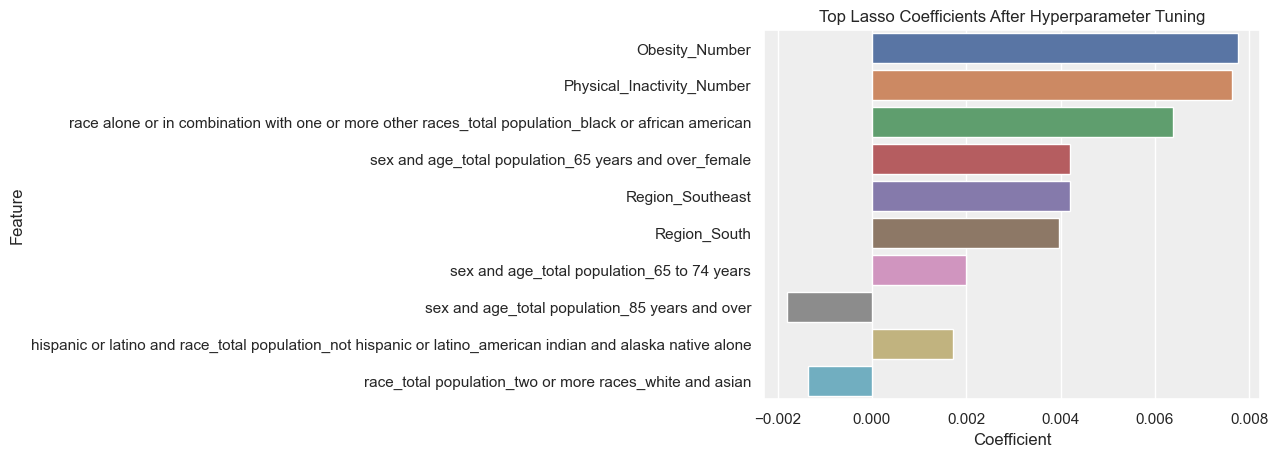

In [46]:
# extract the coefficents and create a dataframe for plotting 
lasso_best_data = pd.concat([pd.DataFrame(X.columns),
                        pd.DataFrame(np.transpose(lasso_model_best.coef_))],
                       axis = 1)
lasso_best_data.columns = ['Feature', 'Coefficient']
lasso_best_data['abs_coef'] = abs(lasso_best_data['Coefficient'])

sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lasso_best_data.nlargest(10, 'abs_coef')).set_title("Top Lasso Coefficients After Hyperparameter Tuning") 
plt.show()

In [41]:
# alternatively, print model coefficients in a table view
lasso_reg_best = pd.DataFrame([lasso_model_best.coef_, X.columns]).T 
lasso_reg_best.columns = ['Coefficient', 'Feature']
lasso_reg_best

,Coefficient,Feature
0,0.007756,Obesity_Number
1,0.007632,Physical_Inactivity_Number
2,-0.0,sex and age_total population_65 years and over...
3,0.0,race_total population
4,-0.0,race_total population_one race
5,0.0,race_total population_one race_black or africa...
6,0.000806,race_total population_one race_american indian...
7,0.000822,race_total population_one race_american indian...
8,-0.000235,race_total population_one race_american indian...
9,0.000304,race_total population_one race_american indian...


**Answer:** Based on the coefficients of the Lasso model after hyperparameter tuning, we can see that Southeast has the highest cofficient (.00419) among all regions, suggesting people in the Southeast are more prone to suffer from diabetes than other regions. Hence, we should prioritize Southeast if there is any program or initiative to reduce diabete rates and enhance public health. 
****
If we consider features like race, gender, or age composition in a region, we can see that females over 65 years old (with a coefficient of .004203) and Black or African Americans (with a coefficient of .006387) are the groups who should be most prioritized for, given that they are more likely to suffer from diabetes based on the coefficient results. 
****
I am actually confident about applying this model to the real world, given that the `RMSE` in the test dataset is relatively small, suggesting a good fit. The results from the plots and regression models indicate that the model match the domain knowledge and theories we have: old people without enough physical activities tend to suffer more from diabetes. We also observe some geographical variations (e.g., people in certain regions have higher diabete rates), and this could be true since people may have different cuisinary traditions, which may involve more sugar intake that leads to more diabetes.